# AMS 527 Homework 3 
**submitted by Jiaxi Zhao on 20th Mar, 2021**

In [1]:
import numpy as np
import numpy.linalg as alg
import numpy.random as r
import sympy as sp
from scipy.linalg import solve as ss
from scipy import integrate
from sympy import diff
from matplotlib import pyplot as plt 
from time import time
%matplotlib inline

## Numerical integration in 1D
In this section, we use numerical integration to calculate the following integral as an approximation for $\pi$
\begin{equation}
    \int_0^1 \frac{4}{1 + x^2} = \pi.
\end{equation}
### Midpoint, trapezoid and Simpson composite quadrature rules
We firstly use the above three methods to calculate the integration.
\begin{itemize}
    \item Midpoint rule: $M(f) = (b - a)f\left( \frac{a + b}{2} \right).$
    \item Trapezoid rule: $T(f) = \frac{b - a}{2}(f\left( a \right) + f(b)).$
    \item Simpson's rule: $S(f) = \frac{b - a}{6}\left(f\left( a \right) + f(b) + 4f\left( \frac{a + b}{2} \right) \right) = \frac{2}{3}M(f) + \frac{1}{3}S(f).$
    \item Romberg's rule: $R(f) = T(f, h) - \frac{4}{3}\left( T(f, h) - T\left(f, \frac{h}{2}\right) \right) = \frac{4}{3}T\left(f, \frac{h}{2}\right) - \frac{1}{3}T\left(f, h\right).$
\end{itemize}

In [2]:
def f(x):
    return 4 / (1 + (x ** 2))
    #return x ** 7    If we change the integrand to this function, then the Simpson's and Romberg's rule will
    # only of order fourth, the same as the theoretic analysis

def Midpoint(N, f, left, right):
    d = right - left
    x = np.linspace(left + d / (2 * N), right - d / (2 * N), N)
    fx = f(x)
    return np.sum(fx) / N

def Trapezoid(N, f, left, right):
    x = np.linspace(left, right, N + 1)
    fx = f(x)
    return (np.sum(fx) - (fx[0] + fx[N]) / 2) / N

def Simpson(N, f, left, right):
    return 2 / 3 * Midpoint(N, f, left, right) + 1 / 3 * Trapezoid(N, f, left, right)

def Romberg(N, f, left, right):
    return 4 / 3 * Trapezoid(N * 2, f, left, right) - 1 / 3 * Trapezoid(N, f, left, right)

def MC(N, f, left, right):
    x = r.rand(N) * (right - left) + left
    return np.sum(f(x)) / N

def PyRoutine(N, f, left, right):
    return integrate.quad(f, left, right)

print(Midpoint(100, f, 0, 1))
print(Trapezoid(100, f, 0, 1))
print(Simpson(100, f, 0, 1))
print(Romberg(100, f, 0, 1))
print(MC(100, f, 0, 1))
print(PyRoutine(100, f, 0, 1))

3.1416009869231245
3.1415759869231294
3.1415926535897927
3.1415926535897913
3.14999951416654
(3.1415926535897936, 3.4878684980086326e-14)


[-1.99999752 -1.99999872 -6.0067972  -6.00679547 -1.37657265]


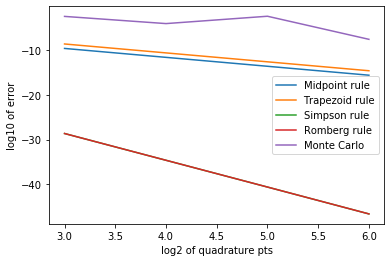

In [3]:
method_array = []
method_array.append(Midpoint)
method_array.append(Trapezoid)
method_array.append(Simpson)
method_array.append(Romberg)
method_array.append(MC)
method_name = ['Midpoint rule', 'Trapezoid rule', 'Simpson rule','Romberg rule','Monte Carlo']
def Convergence(f, method_array, method_name, left, right, start, k):

    method_num = len(method_name)
    error = np.zeros([method_num, k])
    ans = np.pi
    for i in range(start, start + k):
        N = np.power(2, i)
        for j in range(method_num):
            error[j, i - start] = np.abs(method_array[j](N, f, left, right) - ans)  

    for i in range(method_num):
        plt.plot(np.linspace(start, start + k - 1, k), np.log2(error[i,:]), label = method_name[i])
        
    x       = np.linspace(start, start + k - 1, k)
    A       = np.vstack([x, np.ones(len(x))]).T
    m = np.zeros(method_num)
    for i in range(method_num):
        m[i], c   = np.linalg.lstsq(A, np.log2(error[i,:]), rcond = -1)[0]
    print(m)
    plt.xlabel('log2 of quadrature pts')
    plt.ylabel('log10 of error')
    plt.legend()
    plt.show()
    
Convergence(f, method_array, method_name, 0, 1, 3, 4)

In [4]:
x = sp.symbols("x")
u = 1 / (1 + x * x)
d4u = diff(u, x, 4)
print(d4u)
def d4f(x):
    return 24*(16*x**4/(x**2 + 1)**2 - 12*x**2/(x**2 + 1) + 1)/(x**2 + 1)**3

print(Midpoint(100, d4f))

24*(16*x**4/(x**2 + 1)**2 - 12*x**2/(x**2 + 1) + 1)/(x**2 + 1)**3


TypeError: Midpoint() missing 2 required positional arguments: 'left' and 'right'

\begin{remark}
    As is indicated by theoretic analysis, both Midpoint and Trapezoid rules have second order convergence rates. However, Simpson's rule have sixth order convergence rate, even better than the theoretically fourth-order rate. Via analysis, we find that Simpson's rule cannot cancel out the fourth-order term in the integration, so what's the reason for this? In above block, we calculate the integration of the fourth order derivative of the function $f(x)$ and it turns out to be near $0$. Hence it indeed cancel out the fourth order terms and provide a speed up to sixth order convergence rate.
\end{remark}
\begin{remark}
    Meanwhile, when N is taken to be 128, the absolute error of Simpson's rule is close to the machine precision and further increasing N will not improve it performance since the error is dominated by rounding error.
\end{remark}

### Computational complexity comparison with built-in routine in SciPy
In this section, we compare the computational complexity of our implemented quadrature rule with the built-in routine in SciPy. We use the time consumption as a criterion. 

In [ ]:
start = time()
print(Midpoint(10000000, f, 0, 1) - np.pi)
print('Time for Midpoint rule:', time() - start)

start = time()
print(Trapezoid(10000000, f, 0, 1) - np.pi)
print('Time for Trapezoid rule:', time() - start)

start = time()
print(Simpson(100, f, 0, 1) - np.pi)
print('Time for Simpson rule:', time() - start)

start = time()
print(Romberg(100, f, 0, 1) - np.pi)
print('Time for Romberg rule:', time() - start)

start = time()
print(MC(100000000, f, 0, 1) - np.pi)
print('Time for Monte Carlo method:', time() - start)

start = time()
y, err = integrate.quad(f, 0, 1)
print(y - np.pi)
print('Time for SciPy routine:', time() - start)

\begin{remark}
    From above numerical experiments, we find that the Simpson's rule and Romberg's rule performs even competitively comparing with SciPy routine, which makes me very very happy!
\end{remark}

## Numerical integration in 2D
In this section, we use numerical integration to calculate the following integral as an approximation
\begin{equation}
    \int\int_{\Omega} e^{-xy}dxdy.
\end{equation}
We have two choices of integration domain, i.e.
\begin{equation}
    \Omega_1 = [0, 1] \times [0, 1], \  \ \ \  \Omega_2 = \mathbb{D} = \{ (x, y) \ | \ x^2 + y^2 \leq 1, x, y \geq 0 \}.
\end{equation}
### Midpoint, trapezoid and Simpson composite quadrature rules
We firstly use the above three methods to calculate the integration.
\begin{itemize}
    \item Midpoint rule: $M(f) = (b - a)f\left( \frac{a + b}{2} \right).$
    \item Trapezoid rule: $T(f) = \frac{b - a}{2}(f\left( a \right) + f(b)).$
    \item Simpson's rule: $S(f) = \frac{b - a}{6}\left(f\left( a \right) + f(b) + 4f\left( \frac{a + b}{2} \right) \right) = \frac{2}{3}M(f) + \frac{1}{3}S(f).$
\end{itemize}
### Square domain
We first calculate the integral on the square domain, which is more regular.

In [5]:
def f(x, y):
    return np.exp(- x * y)

def Midpoint(N, f, xleft, xright, yleft, yright):
    dx = xright - xleft
    dy = yright - yleft
    x = np.linspace(xleft + dx / (2 * N), xright - dx / (2 * N), N).reshape(1, N)
    y = np.linspace(yleft + dy / (2 * N), yright - dy / (2 * N), N).reshape(N, 1)
    fxy = f(x, y)
    return np.sum(fxy) / N / N

def Trapezoid(N, f, xleft, xright, yleft, yright):
    x = np.linspace(xleft, xright, N + 1).reshape(1, N + 1)
    y = np.linspace(yleft, yright, N + 1).reshape(N + 1, 1)
    fxy = f(x, y)
    return (np.sum(fxy) - np.sum(fxy[0, :]) / 2  \
                        - np.sum(fxy[N, :]) / 2  \
                        - np.sum(fxy[:, 0]) / 2  \
                        - np.sum(fxy[:, N]) / 2 \
                        + (fxy[0, 0] + fxy[N, 0] + fxy[N, N] + fxy[0, N]) / 4) / N / N

def Simpson(N, f, xleft, xright, yleft, yright):
    return 2 / 3 * Midpoint(N, f, xleft, xright, yleft, yright) \
         + 1 / 3 * Trapezoid(N, f, xleft, xright, yleft, yright)

def Romberg(N, f, xleft, xright, yleft, yright):
    #return  4 / 3 * Trapezoid(N * 2, f, xleft, xright, yleft, yright) \
    #      - 1 / 3 * Trapezoid(N, f, xleft, xright, yleft, yright)
    return  4 / 3 * Midpoint(N * 2, f, xleft, xright, yleft, yright) \
          - 1 / 3 * Midpoint(N, f, xleft, xright, yleft, yright)

def MC(N, f, xleft, xright, yleft, yright):
    x = (r.rand(N) * (xright - xleft) + xleft).reshape(N)
    y = (r.rand(N) * (yright - yleft) + yleft).reshape(N)
    return np.sum(f(x, y)) / N

def PyRoutine(N, f, xleft, xright, yleft, yright):
    return integrate.dblquad(f, xleft, xright, yleft, yright)

ans, err = PyRoutine(100, f, 0, 1, 0, 1)
print(Midpoint(100, f, 0, 1, 0, 1) - ans)
print(Trapezoid(100, f, 0, 1, 0, 1) - ans)
print(Simpson(100, f, 0, 1, 0, 1) - ans)
print(Romberg(100, f, 0, 1, 0, 1) - ans)
print(MC(100, f, 0, 1, 0, 1) - ans)
print(PyRoutine(100, f, 0, 1, 0, 1))

-1.964636684781418e-06
3.929380369749325e-06
3.566669182220039e-11
-5.167088978907941e-12
-0.006048131798783385
(0.7965995992970532, 1.1090185172125453e-14)


The convergence rate is again shown in the following block.

[-1.99925591 -2.0011802  -3.99934636 -3.99899052 -0.85214377]


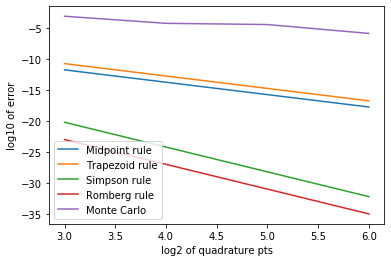

In [6]:
method_array = []
method_array.append(Midpoint)
method_array.append(Trapezoid)
method_array.append(Simpson)
method_array.append(Romberg)
method_array.append(MC)
method_name = ['Midpoint rule', 'Trapezoid rule', 'Simpson rule','Romberg rule','Monte Carlo']
def Convergence(f, method_array, method_name, xleft, xright, yleft, yright, start, k):

    method_num = len(method_name)
    error = np.zeros([method_num, k])
    ans, err = PyRoutine(100, f, 0, 1, 0, 1)
    for i in range(start, start + k):
        N = np.power(2, i)
        for j in range(method_num):
            error[j, i - start] = np.abs(method_array[j](N, f, xleft, xright, yleft, yright) - ans)  

    for i in range(method_num):
        plt.plot(np.linspace(start, start + k - 1, k), np.log2(error[i,:]), label = method_name[i])
        
    x       = np.linspace(start, start + k - 1, k)
    A       = np.vstack([x, np.ones(len(x))]).T
    m = np.zeros(method_num)
    for i in range(method_num):
        m[i], c   = np.linalg.lstsq(A, np.log2(error[i,:]), rcond = -1)[0]
    print(m)
    plt.xlabel('log2 of quadrature pts')
    plt.ylabel('log10 of error')
    plt.legend()
    plt.show()
    
Convergence(f, method_array, method_name, 0, 1, 0, 1, 3, 4)

\begin{remark}
    We should be careful when draw conclusion from this figure. Although the error and convergence rate of quadrature rules and Monte Carlo method are plotted together, one should remember that given $N$, Monte Carlo uses $N$ samples while quadrature rules use $N^2$ grid pts to calculate the integral, which is different from the 1D case. In fact, you can sample from x and y direction $N$ samples respectively and use this to obtain $N^2$ samples, but they are definitely not independent, which may cause the Monte Carlo method to have different rate.
\end{remark}

### Sector domain
We next calculate the integral on the irregular sector domain, we have to pay special attention to the grid pts.

In [21]:
def Midpoint(N, f):
    x = np.zeros(N * N)
    y = np.zeros(N * N)
    index = 0
    for i in range(N):
        ynum = int(round(np.sqrt(1 - ((i + 0.5) / N) ** 2) * N + 0.5)) # number of pts in this layer
        y[index : index + ynum] = np.linspace(0.5 / N, (ynum - 0.5) / N, ynum)
        x[index : index + ynum] = (i + 0.5) / N
        index += ynum
    x = x[:index].reshape(index)
    y = y[:index].reshape(index)
    return np.sum(f(x, y)) / index * np.pi / 4

def Romberg(N, f):
    return  4 / 3 * Midpoint(N * 2, f) \
          - 1 / 3 * Midpoint(N, f)

def MC(N, f):
    # be careful to scale with the 
    R = np.sqrt(r.rand(N))
    theta = r.rand(N) * np.pi / 2
    x = R * np.cos(theta) 
    y = R * np.sin(theta)
    return np.sum(f(x, y)) / N * np.pi / 4

def PyRoutine(N, f, xleft, xright, yleft, yright):
    return integrate.dblquad(f, xleft, xright, yleft, yright)

ans, err = PyRoutine(100, f, 0, 1, 0, lambda x: np.sqrt(1 - x**2))
print(Midpoint(10000, f) - ans)
print(Romberg(10000, f) - ans)
print(MC(100000, f) - ans)

-6.767885840530674e-06
-2.220674525821309e-06
-0.000649449196897911


[-0.99035919 -1.01044583 -0.91711791]


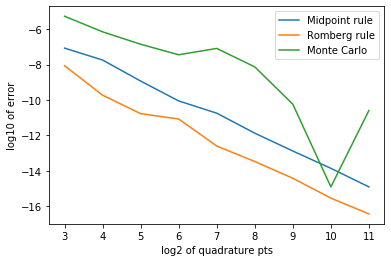

In [27]:
method_array = []
method_array.append(Midpoint)
method_array.append(Romberg)
method_array.append(MC)
method_name = ['Midpoint rule','Romberg rule','Monte Carlo']
def Convergence(f, method_array, method_name, start, k):

    method_num = len(method_name)
    error = np.zeros([method_num, k])
    ans, err = PyRoutine(100, f, 0, 1, 0, lambda x: np.sqrt(1 - x**2))
    for i in range(start, start + k):
        N = np.power(2, i)
        for j in range(method_num):
            error[j, i - start] = np.abs(method_array[j](N, f) - ans)  

    for i in range(method_num):
        plt.plot(np.linspace(start, start + k - 1, k), np.log2(error[i,:]), label = method_name[i])
        
    x       = np.linspace(start, start + k - 1, k)
    A       = np.vstack([x, np.ones(len(x))]).T
    m = np.zeros(method_num)
    for i in range(method_num):
        m[i], c   = np.linalg.lstsq(A, np.log2(error[i,:]), rcond = -1)[0]
    print(m)
    plt.xlabel('log2 of quadrature pts')
    plt.ylabel('log10 of error')
    plt.legend()
    plt.show()
    
Convergence(f, method_array, method_name, 3, 9)

\begin{remark}
    For this irregular domain, it can be observed that all the quadrature rules only have order 1, due to the approximation error at curved boundary.
\end{remark}

#### SciPy routines
In this subsection, we consider to use SciPy routines to calculate this integral in the sector, we use three different routines. The first is to directly integrate on the sector domain. The second is to use transformation of integration variables into polar coordinate. While the last is based on reduction to 1D integral. We discuss them in details in the following.
##### Direct integral
We have checked that the integral domain is correct.

In [8]:
print(integrate.dblquad(f, 0, 1, 0, lambda x: np.sqrt(1 - x**2)))

(0.6751670568500855, 2.6688429244359213e-11)


##### Integration on polar coordinate
\begin{equation}
    \begin{aligned}
        & \ \int_0^1\int_0^{\sqrt{1 - x^2}} e^{-xy}dxdy   \\
        = & \ \int_0^1\int_0^{\frac{\pi}{2}} Re^{-R^2\cos\theta\sin\theta}dRd\theta
    \end{aligned}
\end{equation}

In [9]:
def g(theta, R):
    return R * np.exp(-R**2 * np.cos(theta) * np.sin(theta))
print(integrate.dblquad(g, 0, 1, 0, np.pi/2))

(0.6751670568500828, 1.2828052410510628e-14)


##### Reduction to 1D integration
\begin{equation}
    \begin{aligned}
        & \ \int_0^1\int_0^{\sqrt{1 - x^2}} e^{-xy}dxdy   \\
        = & \ \int_0^1 \frac{1 - e^{-x\sqrt{1 - x^2}}}{x}dxdy
    \end{aligned}
\end{equation}

In [10]:
def l(x):
    return (1 - np.exp(-x * np.sqrt(1 - x**2))) / x
print(integrate.quad(l, 0, 1))

(0.6751670568500855, 2.66878741328469e-11)


\begin{equation}
    \begin{aligned}
        & \ \int_0^{\frac{\pi}{2}}\int_0^1 Re^{-R^2\cos\theta\sin\theta}dRd\theta   \\
        = & \ \int_0^{\frac{\pi}{2}} \frac{1 - e^{-\cos\theta\sin\theta}d\theta}{2\sin\theta\cos\theta}
    \end{aligned}
\end{equation}

In [61]:
def q(theta):
    return (1 - np.exp(-np.cos(theta) * np.sin(theta)))/np.sin(theta * 2)
print(integrate.quad(q, 0, np.pi/2))

(0.6751670568500827, 7.495860119833639e-15)
